#### Testing circuit.py

In [1]:
import numpy as np
import circuit as circ
my_circuit = circ.Circuit(1)

zero = my_circuit.zero_state()
my_circuit.ry(zero,np.pi/2,0)
my_circuit.h(zero,0)

array([0.70710678, 0.70710678])

#### Testing encoding.py

In [19]:
import encoding as enc
enc.coding_bits([1,2,3,5,0,3])
conv_circ = enc.CircuitConversor(2,2)


In [4]:
conv_circ(['10001'],[1,1])

TypeError: list indices must be integers or slices, not tuple

In [ ]:

gates = conv_circ.gates

gates['11011'][0](zero,2,2,2,2)

f,d = gates['00000']

gates['10001'][1]

In [2]:
from sklearn.metrics import accuracy_score,recall_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)


0.5

In [6]:
import fitness
import pandas as pd

In [7]:
bank_data = pd.read_csv('bank_cleaned.csv').iloc[11500:12000]
y = bank_data['y'].values
X = bank_data[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']].values

In [15]:
training_features, training_labels, test_features, test_labels = fitness.Dataset(X,y)

In [24]:
model_33 = fitness.Fitness(3,3,X,y,debug=True)

In [12]:
import numpy as np
def pop(nqubits,nparameters):
    poppy = ''
    pop = []
    for i in range(nqubits*nparameters):
        rng = np.random.default_rng()
        pops = rng.choice(2, 5)
        
        for j in pops:
            poppy = poppy + str(j)
        pop.append(poppy)

    return poppy

pop(3,3)

'010000011110101010001011111011111011100101111'

In [25]:
model_33(pop(3,3))

String: 001010100100100111111110000111100011001011101
 -> accuracy = 0.94, gates = 11.0,recall =0.0


(6.906533333333333, 0.94)

In [26]:
import qsvm

In [27]:
linear_model  = qsvm.QSVM(lambda parameters: model_33.cc(pop(3,3), parameters)[0],training_features,training_labels)

In [9]:
model_new = Fitness(3,3,X,y)

In [13]:
model_new(pop(3,3))

<function Fitness.fitness.<locals>.<lambda> at 0x00000257F9DFF430>


(3.139333333333333, 0.94)

In [2]:
import pandas as pd

In [3]:
bank_data = pd.read_csv('bank_cleaned.csv')

y = bank_data['y'].values
X = bank_data[['age','job','marital','education','default','balance',
            'housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']].values

In [4]:
y.shape

(79844,)

In [5]:
ones = []
for i,j in enumerate(y):
  if j > 0:
    ones.append(i)

len(ones)

39922

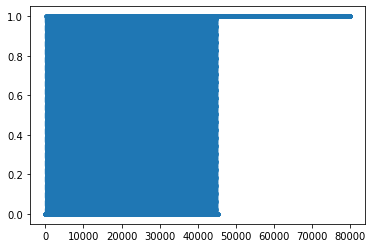

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(len(y)),y,ls='--',marker='.')

In [13]:
X.shape,y.shape

((79844, 16), (79844,))

In [24]:
d = np.column_stack((X,y))

In [20]:

X.shape,y.shape

((79844, 16), (79844,))

In [25]:
d.shape

(79844, 17)

In [30]:
np.random.shuffle(d)

In [40]:
d[:,:16].shape

(79844, 16)

In [33]:
X.shape

(79844, 16)

In [1]:
import pandas as pd
df = pd.read_csv('bank_cleaned.csv')

In [14]:
for i in range(8):
    if i == 7:
        bank_data = df.iloc[70000:79844]
        print(i)
        break
    bank_data = df.iloc[i*10000:i*10000+10000]
    print(i*10000,i*10000+10000)

0 10000
10000 20000
20000 30000
30000 40000
40000 50000
50000 60000
60000 70000
7


In [11]:
len(df)

79844

In [18]:
ind = bank_data.columns

In [24]:
bank_data[ind[17]]

0        0
1        0
2        0
3        0
4        0
        ..
79839    1
79840    1
79841    1
79842    1
79843    1
Name: y, Length: 79844, dtype: int64

In [25]:
type(ind)

pandas.core.indexes.base.Index

In [32]:
for i in ind:
    print(i,len(ind))
    

Unnamed: 0 18
age 18
job 18
marital 18
education 18
default 18
balance 18
housing 18
loan 18
contact 18
day 18
month 18
duration 18
campaign 18
pdays 18
previous 18
poutcome 18
y 18


In [37]:
bank_data.loc[2:3]

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2,2,15.0,2.0,1.0,1.0,0.0,918.0,1.0,1.0,0.0,4.0,8.0,76.0,0.0,0.0,0.0,0.0,0
3,3,29.0,1.0,1.0,3.0,0.0,2420.0,1.0,0.0,0.0,4.0,8.0,92.0,0.0,0.0,0.0,0.0,0


In [38]:
bank_data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,40.0,4.0,1.0,2.0,0.0,3036.0,1.0,0.0,0.0,4.0,8.0,261.0,0.0,0.0,0.0,0.0,0
1,1,26.0,9.0,2.0,1.0,0.0,945.0,1.0,0.0,0.0,4.0,8.0,151.0,0.0,0.0,0.0,0.0,0
2,2,15.0,2.0,1.0,1.0,0.0,918.0,1.0,1.0,0.0,4.0,8.0,76.0,0.0,0.0,0.0,0.0,0
3,3,29.0,1.0,1.0,3.0,0.0,2420.0,1.0,0.0,0.0,4.0,8.0,92.0,0.0,0.0,0.0,0.0,0
4,4,15.0,11.0,2.0,3.0,0.0,917.0,0.0,0.0,0.0,4.0,8.0,198.0,0.0,0.0,0.0,0.0,0


In [39]:
bank_data

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,40.000000,4.000000,1.000000,2.000000,0.0,3036.000000,1.000000,0.000000,0.0,4.000000,8.000000,261.000000,0.000000,0.00000,0.000000,0.000000,0
1,1,26.000000,9.000000,2.000000,1.000000,0.0,945.000000,1.000000,0.000000,0.0,4.000000,8.000000,151.000000,0.000000,0.00000,0.000000,0.000000,0
2,2,15.000000,2.000000,1.000000,1.000000,0.0,918.000000,1.000000,1.000000,0.0,4.000000,8.000000,76.000000,0.000000,0.00000,0.000000,0.000000,0
3,3,29.000000,1.000000,1.000000,3.000000,0.0,2420.000000,1.000000,0.000000,0.0,4.000000,8.000000,92.000000,0.000000,0.00000,0.000000,0.000000,0
4,4,15.000000,11.000000,2.000000,3.000000,0.0,917.000000,0.000000,0.000000,0.0,4.000000,8.000000,198.000000,0.000000,0.00000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,79839,16.953906,1.000000,0.046094,2.907811,0.0,1080.829698,0.000000,0.000000,0.0,9.769528,5.769528,963.663264,1.000000,0.00000,0.000000,0.000000,1
79840,79840,0.462676,7.629859,2.000000,2.907465,0.0,1264.185070,0.046268,0.046268,0.0,4.601479,8.000000,442.444789,2.861197,0.00000,0.000000,0.000000,1
79841,79841,20.285328,1.000000,1.000000,1.000000,0.0,1083.389821,0.935030,0.935030,0.0,11.389821,7.805090,610.440717,0.389821,0.00000,0.000000,0.000000,1
79842,79842,22.664764,2.600571,1.000000,1.067047,0.0,1776.661910,0.533524,0.533524,0.0,13.002854,4.734665,973.726103,0.533524,0.00000,0.000000,0.000000,1


In [42]:
bank_data = bank_data.drop(columns=ind[0])

In [43]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40.000000,4.000000,1.000000,2.000000,0.0,3036.000000,1.000000,0.000000,0.0,4.000000,8.000000,261.000000,0.000000,0.00000,0.000000,0.000000,0
1,26.000000,9.000000,2.000000,1.000000,0.0,945.000000,1.000000,0.000000,0.0,4.000000,8.000000,151.000000,0.000000,0.00000,0.000000,0.000000,0
2,15.000000,2.000000,1.000000,1.000000,0.0,918.000000,1.000000,1.000000,0.0,4.000000,8.000000,76.000000,0.000000,0.00000,0.000000,0.000000,0
3,29.000000,1.000000,1.000000,3.000000,0.0,2420.000000,1.000000,0.000000,0.0,4.000000,8.000000,92.000000,0.000000,0.00000,0.000000,0.000000,0
4,15.000000,11.000000,2.000000,3.000000,0.0,917.000000,0.000000,0.000000,0.0,4.000000,8.000000,198.000000,0.000000,0.00000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,16.953906,1.000000,0.046094,2.907811,0.0,1080.829698,0.000000,0.000000,0.0,9.769528,5.769528,963.663264,1.000000,0.00000,0.000000,0.000000,1
79840,0.462676,7.629859,2.000000,2.907465,0.0,1264.185070,0.046268,0.046268,0.0,4.601479,8.000000,442.444789,2.861197,0.00000,0.000000,0.000000,1
79841,20.285328,1.000000,1.000000,1.000000,0.0,1083.389821,0.935030,0.935030,0.0,11.389821,7.805090,610.440717,0.389821,0.00000,0.000000,0.000000,1
79842,22.664764,2.600571,1.000000,1.067047,0.0,1776.661910,0.533524,0.533524,0.0,13.002854,4.734665,973.726103,0.533524,0.00000,0.000000,0.000000,1


In [47]:
samples = 5

bank_data.sample(n=5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
73214,3.960857,8.000000,2.0,1.078285,0.0,2435.373719,0.0,0.0,0.0,28.373719,10.039143,366.904008,0.960857,0.0,0.0,0.0,1
42184,20.000000,4.000000,2.0,2.000000,0.0,3921.000000,0.0,0.0,0.0,8.000000,9.000000,347.000000,3.000000,186.0,2.0,2.0,1
27132,34.000000,7.000000,0.0,1.000000,0.0,3324.000000,0.0,0.0,1.0,20.000000,9.000000,76.000000,0.000000,116.0,1.0,0.0,0
31356,13.000000,4.000000,2.0,2.000000,0.0,1031.000000,0.0,0.0,0.0,16.000000,7.000000,187.000000,0.000000,0.0,0.0,0.0,1
55286,8.865627,4.656768,2.0,1.522395,0.0,1733.283840,0.0,0.0,0.0,9.910418,8.611977,676.611977,0.000000,0.0,0.0,0.0,1


In [7]:
rounded  = np.around(bank_data)

In [8]:
rounded

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,40.0,4.0,1.0,2.0,0.0,3036.0,1.0,0.0,0.0,4.0,8.0,261.0,0.0,0.0,0.0,0.0,0
1,1,26.0,9.0,2.0,1.0,0.0,945.0,1.0,0.0,0.0,4.0,8.0,151.0,0.0,0.0,0.0,0.0,0
2,2,15.0,2.0,1.0,1.0,0.0,918.0,1.0,1.0,0.0,4.0,8.0,76.0,0.0,0.0,0.0,0.0,0
3,3,29.0,1.0,1.0,3.0,0.0,2420.0,1.0,0.0,0.0,4.0,8.0,92.0,0.0,0.0,0.0,0.0,0
4,4,15.0,11.0,2.0,3.0,0.0,917.0,0.0,0.0,0.0,4.0,8.0,198.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,79839,17.0,1.0,0.0,3.0,0.0,1081.0,0.0,0.0,0.0,10.0,6.0,964.0,1.0,0.0,0.0,0.0,1
79840,79840,0.0,8.0,2.0,3.0,0.0,1264.0,0.0,0.0,0.0,5.0,8.0,442.0,3.0,0.0,0.0,0.0,1
79841,79841,20.0,1.0,1.0,1.0,0.0,1083.0,1.0,1.0,0.0,11.0,8.0,610.0,0.0,0.0,0.0,0.0,1
79842,79842,23.0,3.0,1.0,1.0,0.0,1777.0,1.0,1.0,0.0,13.0,5.0,974.0,1.0,0.0,0.0,0.0,1


In [76]:
output="bank_testdata.csv"
df = pd.read_csv('bank_cleaned.csv')
def ones_rat(n = 2000):
    bank_data = df.sample(n = n)#,random_state=3)

    ones = 0
    for i in bank_data['y']:
        if i > 0:
            ones +=1
    ones_ratio = ones/len(bank_data)
    print(f'ones_ratio = {ones_ratio}')

In [97]:
ones_rat(2000)

ones_ratio = 0.491


In [19]:
import numpy as np
import pandas as pd
df = pd.read_csv('bank_cleaned.csv')
df = np.around(df)
#df = np.int0(df)

In [10]:
df.to_csv('bank_round.csv')

In [20]:
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,40.0,4.0,1.0,2.0,0.0,3036.0,1.0,0.0,0.0,4.0,8.0,261.0,0.0,0.0,0.0,0.0,0
1,1,26.0,9.0,2.0,1.0,0.0,945.0,1.0,0.0,0.0,4.0,8.0,151.0,0.0,0.0,0.0,0.0,0
2,2,15.0,2.0,1.0,1.0,0.0,918.0,1.0,1.0,0.0,4.0,8.0,76.0,0.0,0.0,0.0,0.0,0
3,3,29.0,1.0,1.0,3.0,0.0,2420.0,1.0,0.0,0.0,4.0,8.0,92.0,0.0,0.0,0.0,0.0,0
4,4,15.0,11.0,2.0,3.0,0.0,917.0,0.0,0.0,0.0,4.0,8.0,198.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,79839,17.0,1.0,0.0,3.0,0.0,1081.0,0.0,0.0,0.0,10.0,6.0,964.0,1.0,0.0,0.0,0.0,1
79840,79840,0.0,8.0,2.0,3.0,0.0,1264.0,0.0,0.0,0.0,5.0,8.0,442.0,3.0,0.0,0.0,0.0,1
79841,79841,20.0,1.0,1.0,1.0,0.0,1083.0,1.0,1.0,0.0,11.0,8.0,610.0,0.0,0.0,0.0,0.0,1
79842,79842,23.0,3.0,1.0,1.0,0.0,1777.0,1.0,1.0,0.0,13.0,5.0,974.0,1.0,0.0,0.0,0.0,1


In [1]:
output = 'bank_out.csv'

In [5]:
with open(output, "w") as f:
    f.write('line')
    f.write('\n')
x = 2

In [8]:
with open(output, "a") as f:
    f.write('line'+str(x))

